In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
# pyber_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')
# pyber_df = pd.merge(ride_data_df, city_data_df, how='outer', on='city')

pyber_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

# Display the data table for preview
pyber_df.head()

# Total = pyber_df["city"].count()
# print(Total)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# to get my head around the raw city data (120 records)
city_data_df.head()
# Total = city_data_df["city"].count()
# print(Total)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# to get my head around the raw ride data (2375 records)
ride_data_df.head()
# Total = ride_data_df["city"].count()
# print(Total)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# to check the combined data (shoudl have 2375 records and have the data from both df's)
pyber_df.head()
# Total = pyber_df["city"].count()
# print(Total)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

#Creates the group by city
city_group = pyber_df.groupby(["city"])

#WORKS VVVVVVVV
# Average Fare
average_fare_city = city_group["fare"].mean()
# average_fare_city.head()
#WORKS ^^^^^^^^
average_fare_city_df = pd.DataFrame(average_fare_city)
# average_fare_city_df.head()

#WORKS VVVVVVVV
# Total Number of Rides Per City .value_counts()
total_Rides_city = city_group["ride_id"].count()
# average_Rides_city.head()
total_Rides_city_df = pd.DataFrame(total_Rides_city)
#WORKS ^^^^^^^^

#WORKS VVVVVVVV
# Total Number of Drivers Per City = driver_count
##### city_data_df the field driver_count
#WORKS ^^^^^^^^


#WORKS VVVVVVVV
# City Type (Urban, Suburban, Rural)
##### city_data_df the field type
#WORKS ^^^^^^^^


city_df = pd.merge(city_data_df,average_fare_city_df, on="city")
city_df

city_df1 = pd.merge(city_df, total_Rides_city_df, on="city")
# city_df1

# city_df1.dtypes

############ Might need this to convert fare to numeric, we will see
# Use pd.to_numeric() method to convert the datatype of the Amount column
# city_df1['fare'] = pd.to_numeric(city_df1['fare'])
# city_df1.dtypes

city_df1

# Total = city_df1["city"].count()
# print(Total)

,city,driver_count,type,fare,ride_id
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31
5,West Anthony,70,Urban,24.736667,30
6,West Angela,48,Urban,25.990000,39
7,Martinezhaven,25,Urban,22.651250,24
8,Karenberg,22,Urban,26.340000,17
9,Barajasview,26,Urban,25.332273,22


In [6]:
# split into three tables by type



urban_for_chart = (city_df1.query("type == 'Urban'"))
urban_for_chart_df = urban_for_chart[["city", "driver_count", "type", "fare", "ride_id"]]
urban_for_chart_df
                
Suburban_for_chart = (city_df1.query("type == 'Suburban'"))
Suburban_for_chart_df = Suburban_for_chart[["city", "driver_count", "type", "fare", "ride_id"]]
Suburban_for_chart_df

Rural_for_chart = (city_df1.query("type == 'Rural'"))
Rural_for_chart_df = Rural_for_chart[["city", "driver_count", "type", "fare", "ride_id"]]
Rural_for_chart_df.head()
                                     

,city,driver_count,type,fare,ride_id
102,South Jennifer,7,Rural,35.264286,7
103,West Heather,4,Rural,33.890000,9
104,Newtonview,1,Rural,36.745000,4
105,North Holly,8,Rural,29.130000,9
106,Michaelberg,6,Rural,34.997500,12


## Bubble Plot of Ride Sharing Data

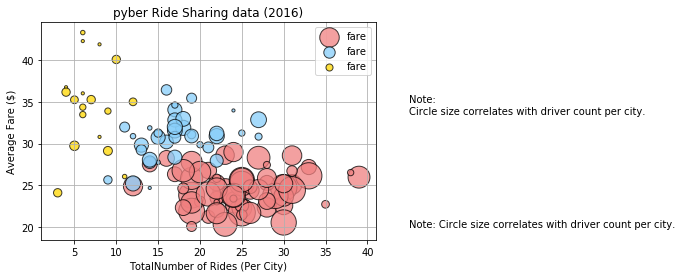

In [16]:
# Obtain the x and y coordinates for each of the three city types
plt.ylim(18.5,44.5)
plt.xlim(1,41)
# Build the scatter plots for each city types
x_axisu = urban_for_chart_df["ride_id"]
y_axisu = urban_for_chart_df["fare"]
x_axiss = Suburban_for_chart_df["ride_id"]
y_axiss = Suburban_for_chart_df["fare"]
x_axisr = Rural_for_chart_df["ride_id"]
y_axisr = Rural_for_chart_df["fare"]
dcu = urban_for_chart_df["driver_count"]
dcs = Suburban_for_chart_df["driver_count"]
dcr = Rural_for_chart_df["driver_count"]

urban = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
suburban = plt.scatter(x_axiss, y_axiss, marker="o", facecolors="lightskyblue",edgecolors="black", s=10*dcs, alpha=0.75)
rural = plt.scatter(x_axisr, y_axisr, marker="o", facecolors="gold",edgecolors="black", s=10*dcr, alpha=0.75)
plt.grid()

# Incorporate the other graph properties
# plt.grid=True
# plt.plot(x,y,linewidth=4.0)

plt.title("pyber Ride Sharing data (2016)")
plt.xlabel("TotalNumber of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# plt.grid()
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')


# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
plt.text(45,
         35,
        "Note:")
plt.text(45,
         33.5,
         "Circle size correlates with driver count per city.")
# plt.text(45,
#          20,
#          "Note: Circle size correlates with driver count per city.", wrap=True)

# Save Figure
plt.show()

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

In [9]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

In [11]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [12]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [14]:
# Show Figure
plt.show()